In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
import matplotlib.gridspec as gridspec

In [3]:
rcParams['savefig.dpi'] = 300
rcParams['figure.dpi'] = 300
rcParams['font.family'] = 'Lucida Bright'
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

### Read data to df's

In [4]:
n_sce = 8 # amount of schenarios
n_loc = 3 # amount of locations

df_sl = []
project_name = "Eastbourne_01"
for scenario in range(n_sce):
    df_l = []
    work_path = "../../../Schenarios/Scenario_"+str(scenario+1)+"/SWAN/Output/"
    if (scenario == 7): # deviation in folder name
        work_path = "../../../Schenarios/Scenario_"+str(scenario+1)+"_alt/SWAN/Output/"
    for loc in range(n_loc):
        head = (pd.read_csv(work_path+project_name+"_c"+str(loc+1)+".tab",sep='\s+',skiprows=4)).columns[1:]
        df = pd.read_csv(work_path+project_name+"_c"+str(loc+1)+".tab",sep='\s+',skiprows=7, names= head)
        df_l.append(df[df.Depth!=-99])
    df_sl.append(df_l)
df.columns

Index(['Dist', 'Depth', 'Hsig', 'Wlen', 'Watlev', 'PkDir', 'Dissip', 'Sfric',
       'Ssurf', 'Swcap', 'Sswell', 'TPsmoo', 'Tm01', 'Dir'],
      dtype='object')

### Convert all data types and replace empty values

In [5]:
data_sl = []
for scenario in range(n_sce):
    data_l = []
    for loc in range(n_loc):
        data_list = []
        for i in range(len(df.columns)):
            data_list.append(np.array(df_sl[scenario][loc][df.columns[i]],dtype=float))
        data_l.append(data_list)
    data_sl.append(data_l)
data_sl = np.array(data_sl)

In [6]:
def pull(var,scenario=1,loc=1,data=data_sl,columns=df.columns):
    dist_i = list(columns).index(var)
    return(data_sl[scenario-1,loc-1,dist_i])

3.2329

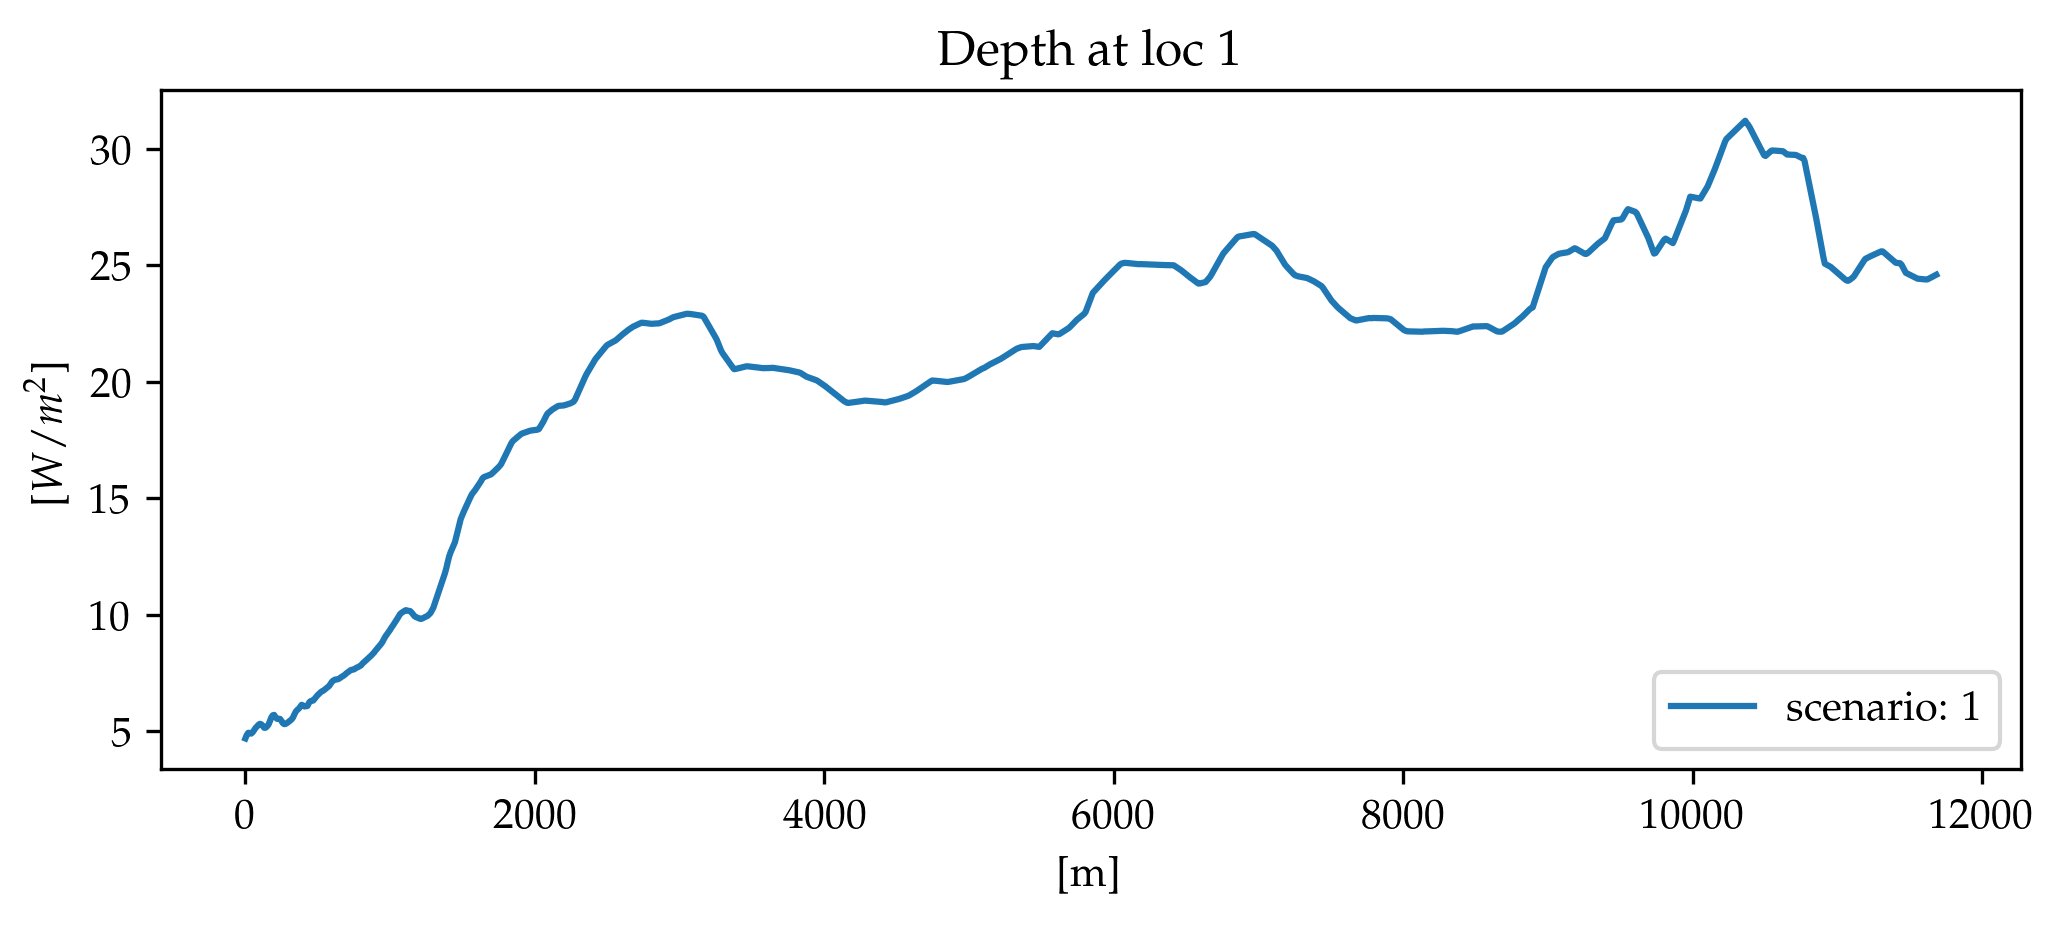

In [40]:
scenarios = [1]
locs = [1]
var = 'Depth'

plt.figure(figsize=[8,3])
plt.title(var+" at loc "+str(locs[0]))
plt.xlabel('[m]')
plt.ylabel('[$W/m^2$]')

var_i = list(df.columns).index(var)
dist_i = list(df.columns).index("Dist")
for j in range(len(scenarios)):
    for i in range(len(locs)):
        x = pull('Dist',loc=locs[i],scenario=scenarios[j])
#         x -= x[0]
        y = pull(var,loc=locs[i],scenario=scenarios[j])
        plt.plot(x,y,label='scenario: '+str(scenarios[j]))
plt.legend(loc='lower right')


pull('Watlev',loc=locs[i],scenario=scenarios[j])[200]

# Cross section Wave breaking analyses

In [30]:
loc = 3
for scenario in range(1,9):
    print(scenario, pull('Depth',scenario,loc)[200])

1 10.2899
2 10.1867
3 10.0686
4 9.9398
5 9.875
6 9.7317
7 9.5633
8 9.9955


### Depth induced breaking
Breaking parameter via Battjes and Stive (1985) as decribed by Holthuijsen

### $\frac{H_{m0}}{\gamma(\zeta+d)}$ plot & $\gamma$ plot

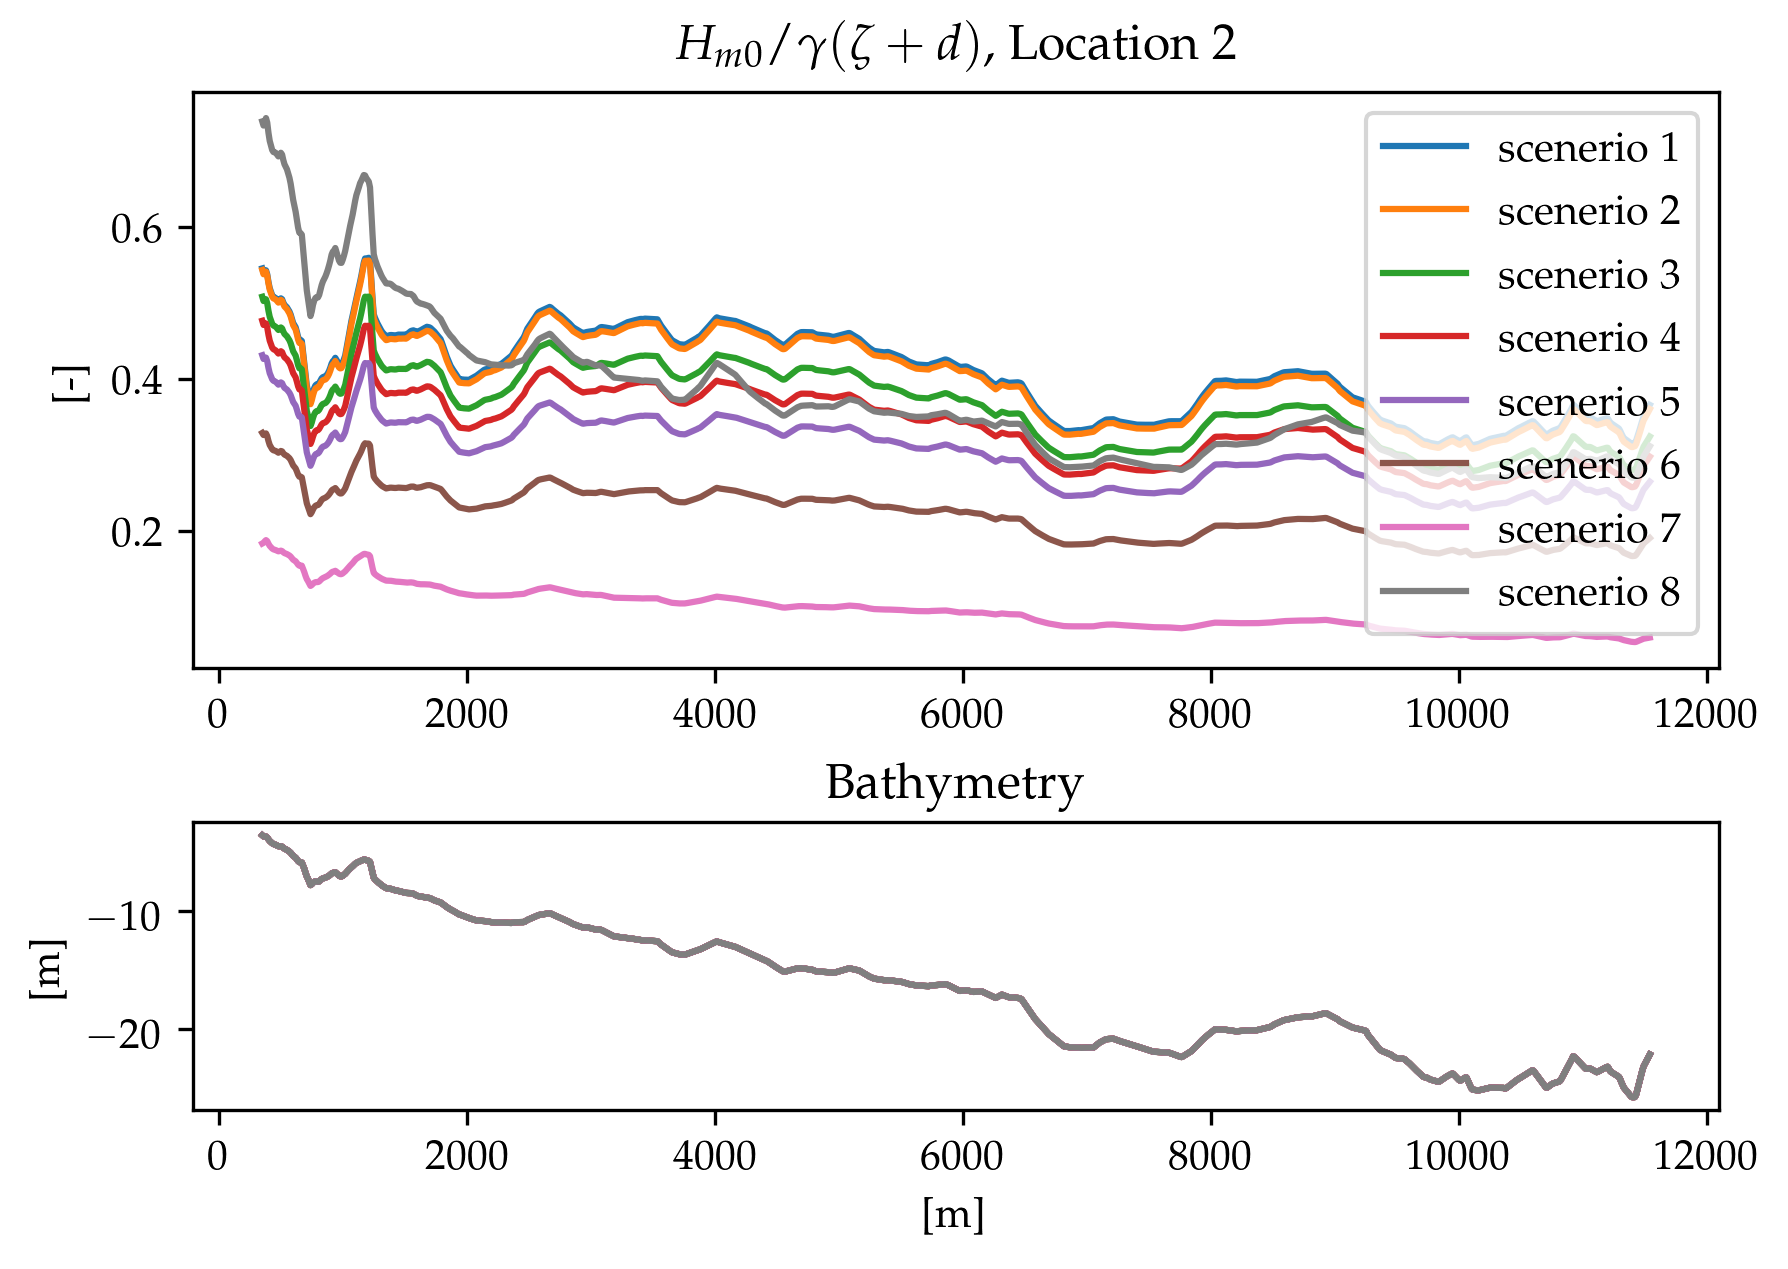

In [9]:
scenarios = [1,2,3,4,5,6,7,8]
locs = [2]

plt.figure()
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[2, 1])
plt.subplot(spec[0])
plt.tight_layout(pad=2)
plt.title('$H_{m0}/\gamma(\zeta+d)$, Location '+str(locs[0]))
plt.ylabel('[-]')

for j in range(len(scenarios)):
    for i in range(len(locs)):
        # get data
        T = [9.5016076, 9.4770921, 9.0278389, 8.6234757, 8.0506301, 6.8425639, 6.8425639, 7.8807362][scenarios[i]]
        Hm0 = pull('Hsig',scenarios[j],locs[i])
        d = pull('Depth',scenarios[j],locs[i])
        x = pull('Dist',scenarios[j],locs[i])

        # calculate
        Hrms = Hm0/2
        Lp0 = 9.81*T**2/(2*np.pi)
        s0 = Hrms/Lp0
        gamma = 0.5 + 0.4*np.tanh(33*s0)
        breaking_rat_d = Hm0 / (gamma * d)

        plt.plot(x,breaking_rat_d,label='scenerio '+str(scenarios[j]))

plt.legend() 
        
plt.subplot(spec[1])
plt.title('Bathymetry')
plt.xlabel('[m]')
plt.ylabel('[m]')
for j in range(len(scenarios)):
    for i in range(len(locs)):
        x = pull('Dist',scenarios[j],locs[i])
        plt.plot(x,-pull('Depth',scenarios[j],locs[i])+pull('Watlev',scenarios[j],locs[i]))

### Directionality plot

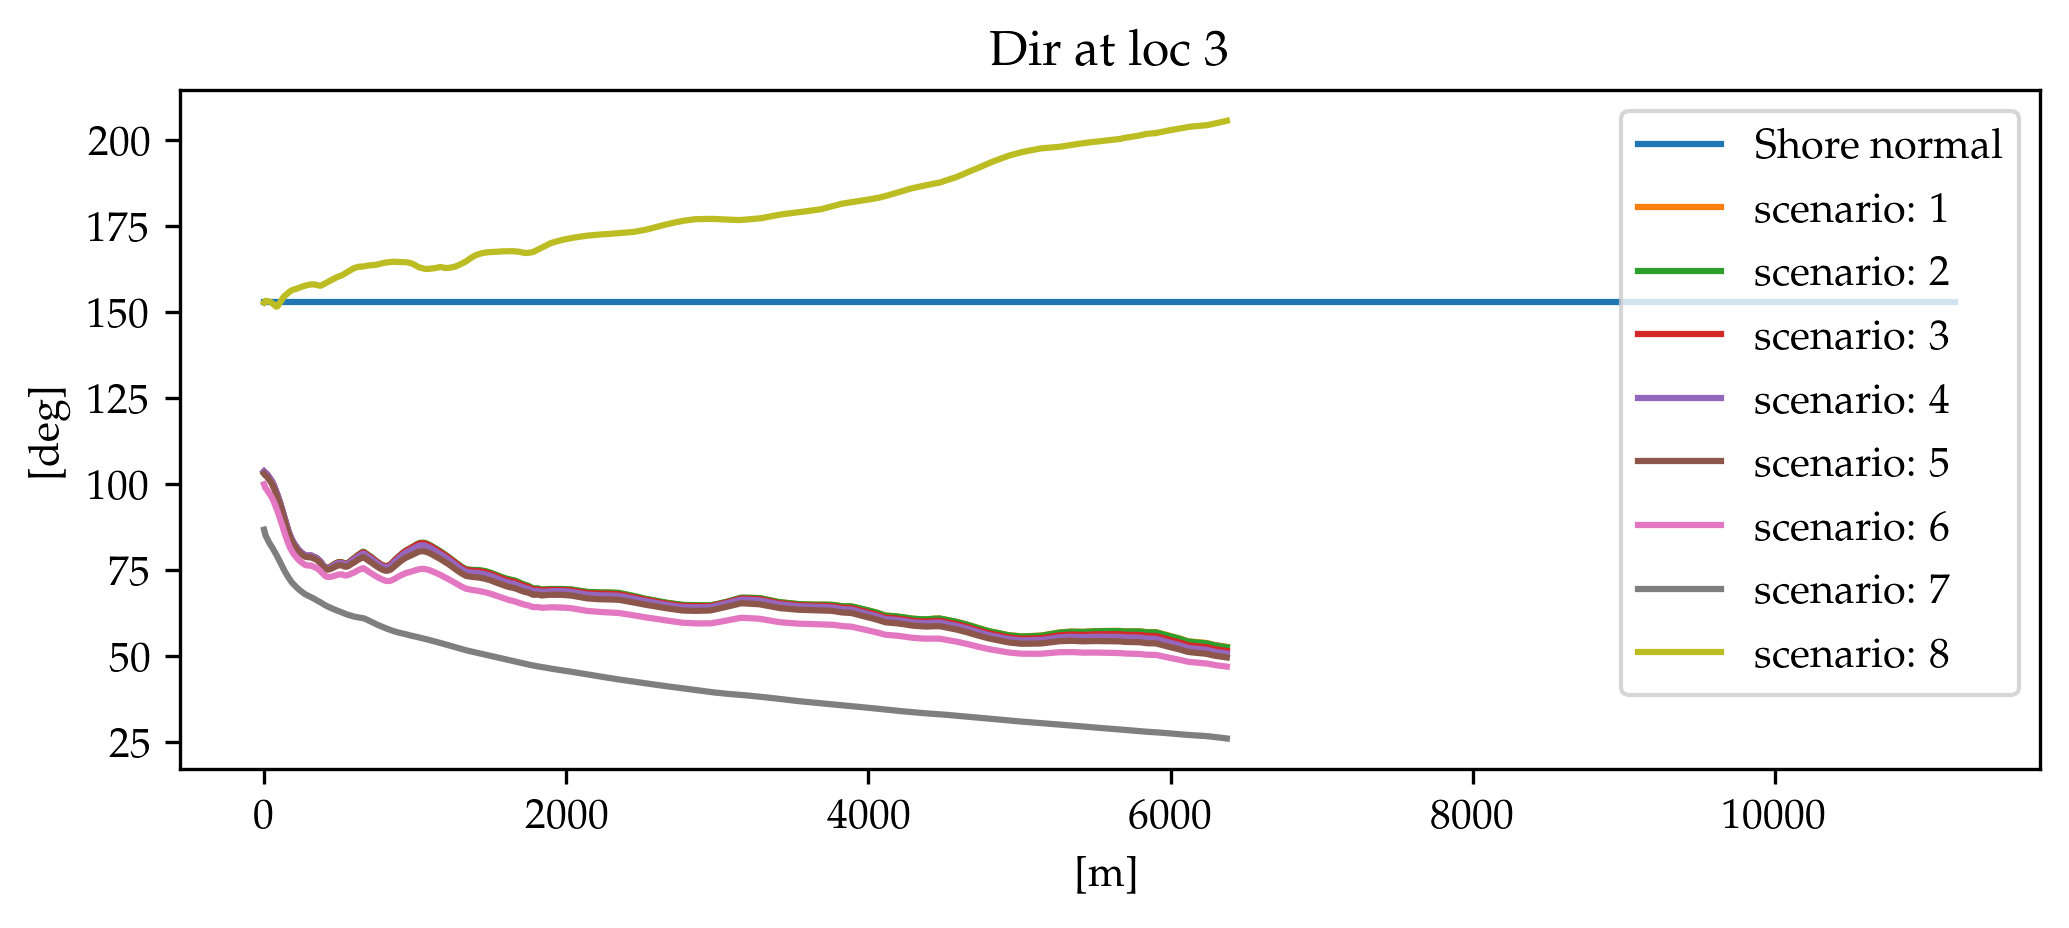

In [17]:
scenarios = np.arange(1,n_sce+1)
locs = [3]
sn_dirs = np.array([45, 30, 63]) +90
var = "Dir"

plt.figure(figsize=[8,3])
plt.title(var+" at loc "+str(locs[0]))
plt.xlabel('[m]')
plt.ylabel('[$\deg$]')

var_i = list(df.columns).index(var)
dist_i = list(df.columns).index("Dist")

plt.plot([x[0],x[-1]],[sn_dirs[locs[i]-1],sn_dirs[locs[i]-1]],label='Shore normal')
for j in range(len(scenarios)):
    for i in range(len(locs)):
        x = pull('Dist',loc=locs[i],scenario=scenarios[j])
        x -= x[0]
        y = pull(var,loc=locs[i],scenario=scenarios[j])
        y[y>300] = y[y>300]-360
        plt.plot(x,y,label='scenario: '+str(scenarios[j]))
plt.legend()

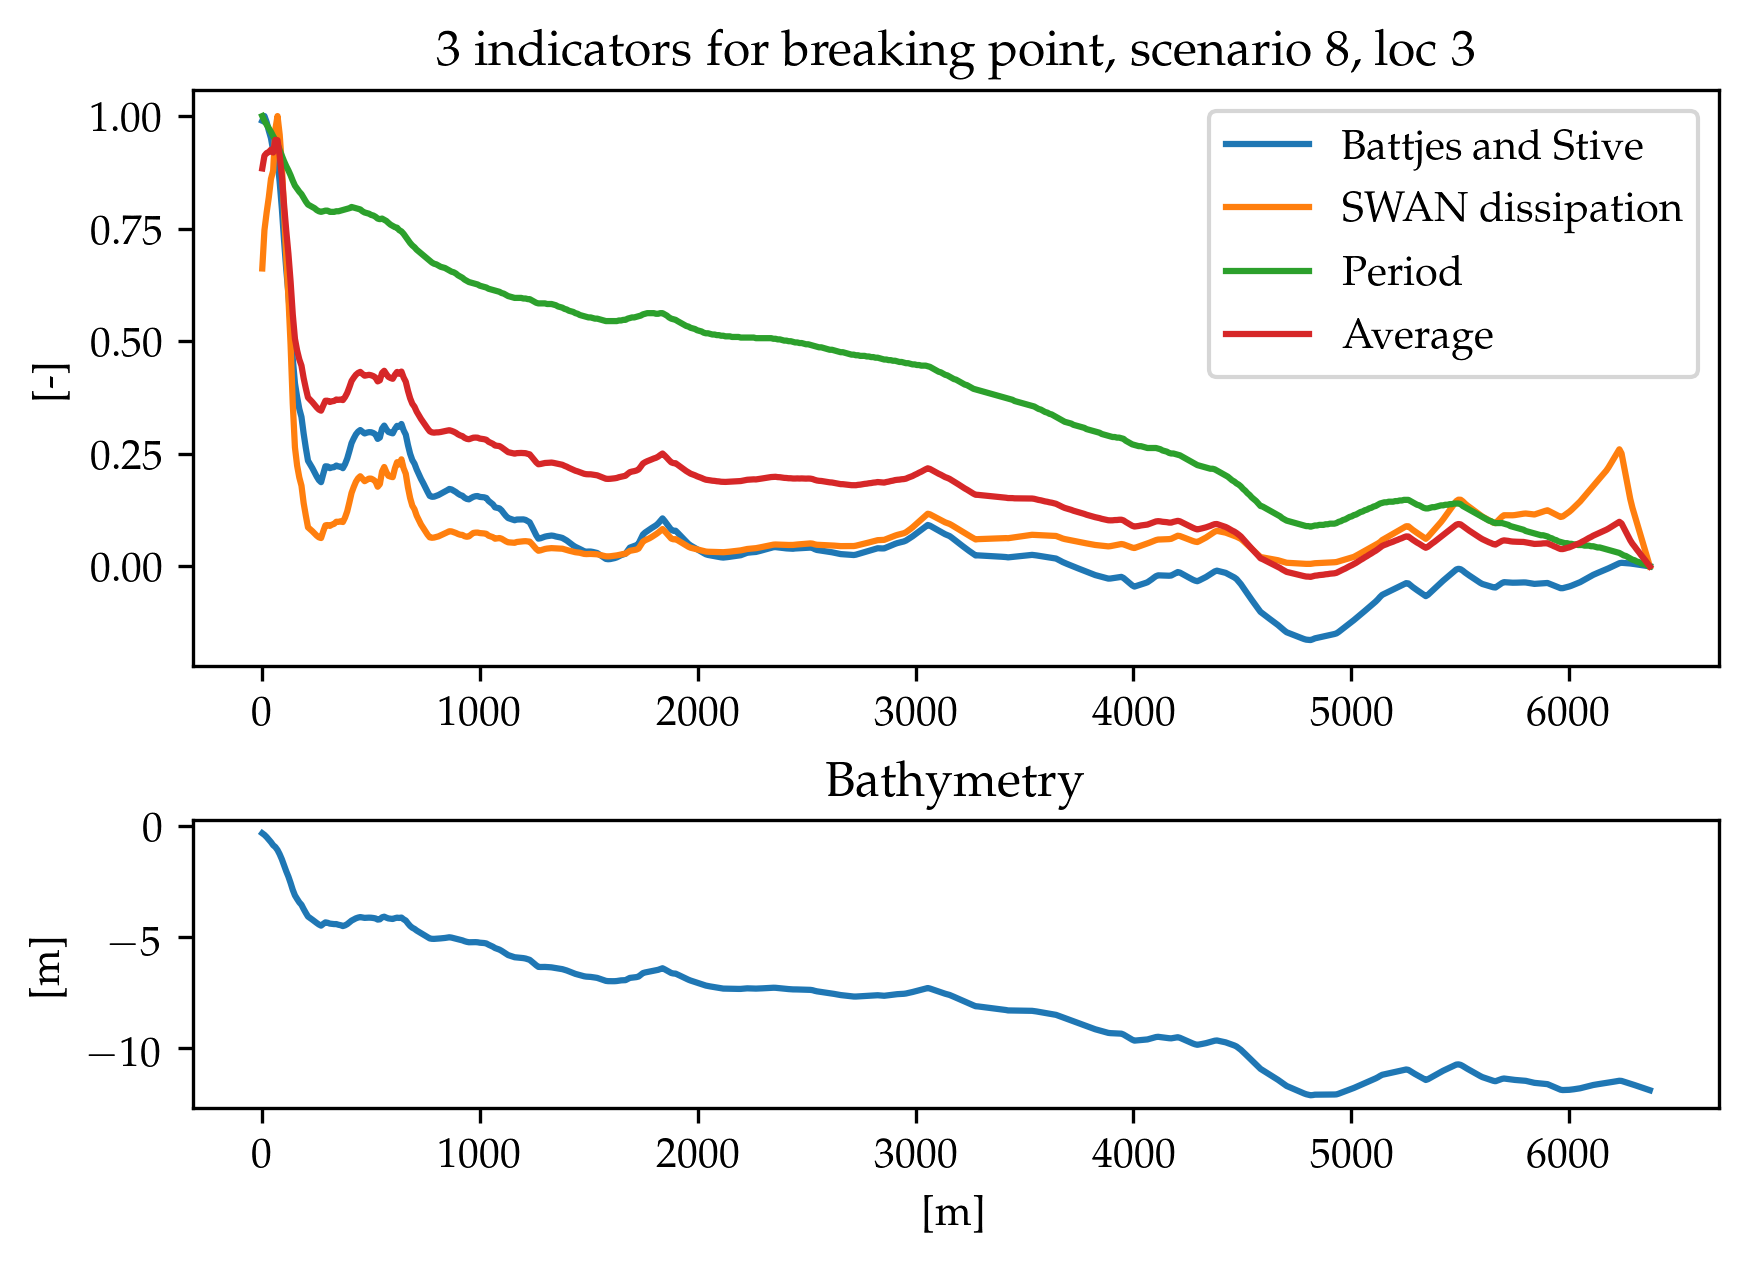

In [66]:
locs = [3]
scenarios = [8]

plt.figure()
plt.subplot(spec[0])
plt.tight_layout(pad=2)
plt.ylabel('[-]')
for loc in range(locs[0],locs[0]+1):
    plt.title('3 indicators for breaking point, scenario '+str(scenario)+', loc '+str(loc))
    for scenario in range(scenarios[0],scenarios[0]+1):
        T = [9.5016076, 9.4770921, 9.0278389, 8.6234757, 8.0506301, 6.8425639, 6.8425639, 7.8807362][scenario-1]
        db = pull('Hsig',scenario = scenario,loc=loc) / ((0.5 + 0.4*np.tanh(33*((pull('Hsig',scenario = scenario,loc=loc)/2)/(9.81*T**2/(2*np.pi))))) * pull('Depth',scenario = scenario,loc=loc))
        sb = pull('Ssurf',scenario = scenario,loc=loc)
        pp = pull('TPsmoo',scenario = scenario,loc=loc)
        db_sc = (db-db[-1])/(np.max(db)-(db[-1]))
        sb_sc = (sb-sb[-1])/(np.max(sb)-(sb[-1]))
        pp_sc = (pp-pp[-1])/(np.max(pp)-(pp[-1]))
        x = pull('Dist',loc=loc)
        plt.plot(x,db_sc,label='Battjes and Stive')
        plt.plot(x,sb_sc,label='SWAN dissipation')
        plt.plot(x,pp_sc,label='Period')
        plt.legend()
        av = (db_sc+sb_sc+pp_sc)/3
        plt.plot(x,av,label='Average')
plt.legend()

plt.subplot(spec[1])
plt.xlabel('[m]')
plt.ylabel('[m]')
plt.title('Bathymetry')
x = pull('Dist',scenarios[0],locs[0])
plt.plot(x,-pull('Depth',scenarios[0],locs[0])+pull('Watlev',scenarios[0],locs[0]))

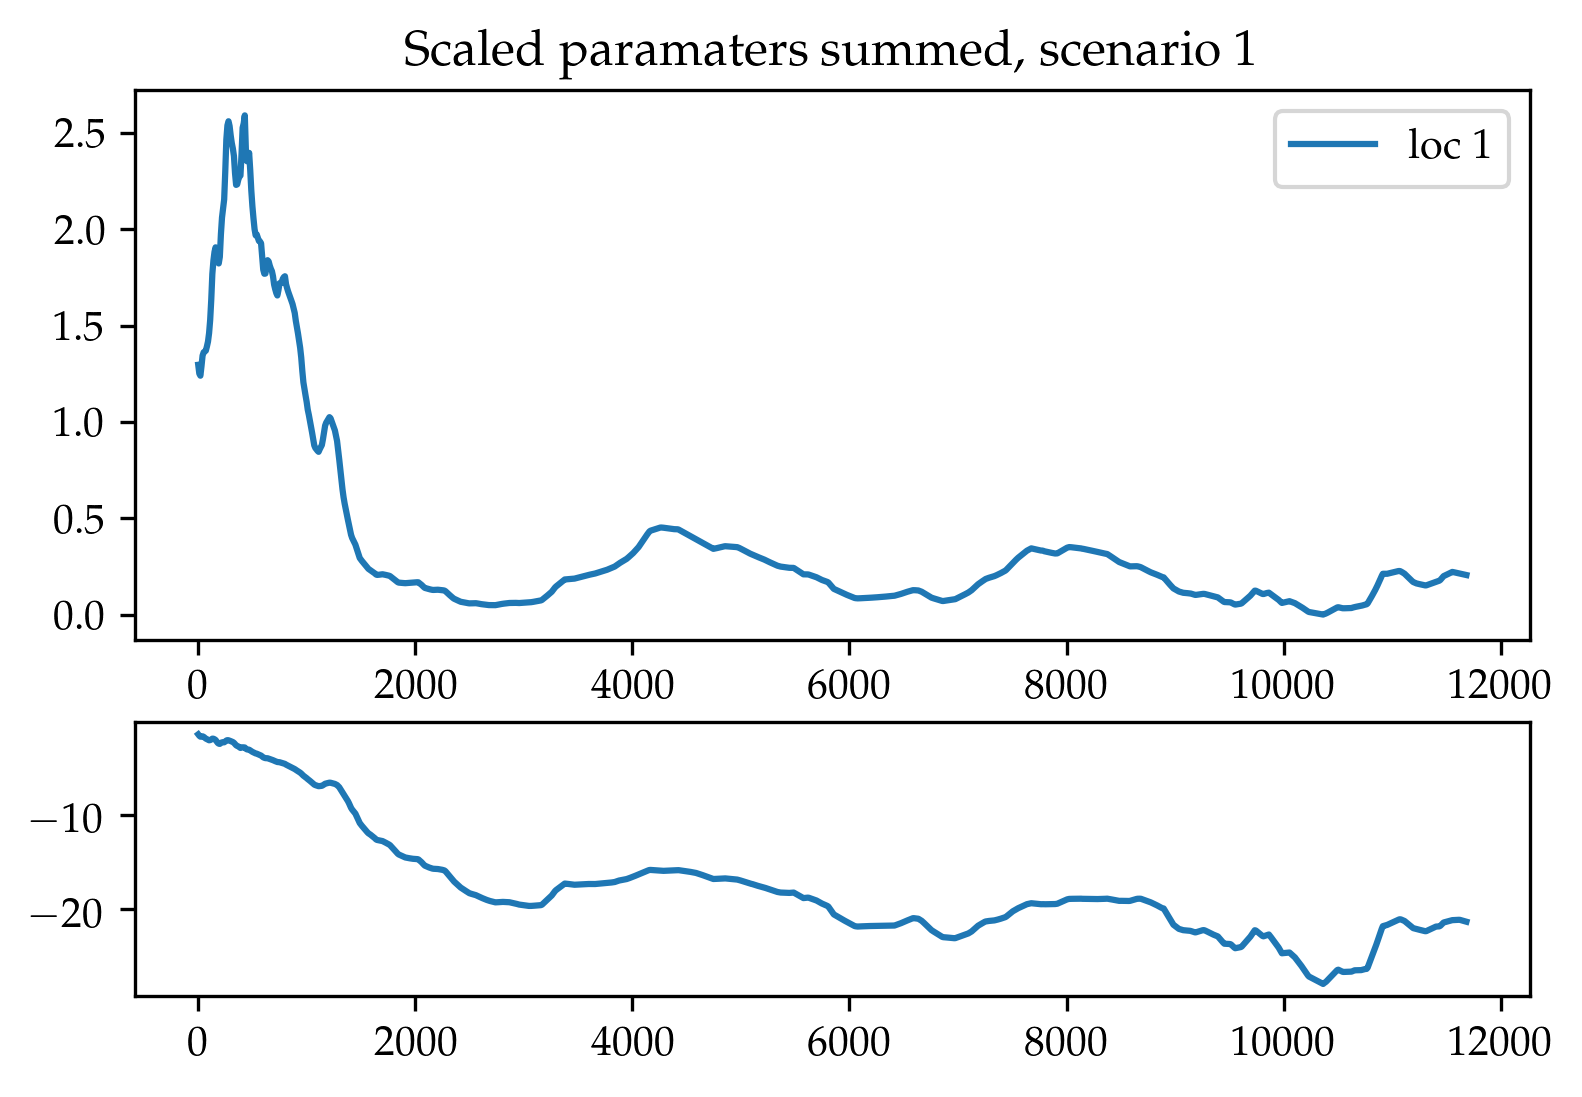

In [48]:
# # maxs = [0.7447477205863766,0.5600694920716999,0.7363443970680983], [0.0042891,0.004076,0.0029206], [12.1726,12.0074,11.2682] 
# # mins = [0.29269110282964,0.2878433105694315,0.2543006688890641], [0,0,0], [11.4222,11.3431,10.6186]

# locs = [1]
# scenarios = [1]

# plt.figure()
# plt.subplot(spec[0])
# for loc in range(locs[0],locs[0]+1):
#     for scenario in range(scenarios[0],scenarios[0]+1):
#         T = [9.5016076, 9.4770921, 9.0278389, 8.6234757, 8.0506301, 6.8425639, 6.8425639, 7.8807362][scenario-1]
#         db = pull('Hsig',scenario = scenario,loc=loc) / ((0.5 + 0.4*np.tanh(33*((pull('Hsig',scenario = scenario,loc=loc)/2)/(9.81*T**2/(2*np.pi))))) * pull('Depth',scenario = scenario,loc=loc))
#         sb = pull('Ssurf',scenario = scenario,loc=loc)
#         pp = pull('TPsmoo',scenario = scenario,loc=loc)
#         db_sc = (db-min(db))/(max(db)-min(db))
#         sb_sc = (sb-min(sb))/(max(sb)-min(sb))
#         pp_sc = (pp-min(pp))/(max(pp)-min(pp))
#         x = pull('Dist',loc=loc)
# #         plt.plot(db_sc,label='Battjes and Stive')
# #         plt.plot(sb_sc,label='SWAN dissipation')
# #         plt.plot(pp_sc,label='Period')
#         plt.plot(x,(db_sc+sb_sc+pp_sc),label='loc '+str(loc))
# #         print(max(pp))
# plt.legend()
# plt.title('Scaled paramaters summed, scenario '+str(scenario))

# plt.subplot(spec[1])

# x = pull('Dist',scenarios[0],locs[0])
# plt.plot(x,-pull('Depth',scenarios[0],locs[0])+pull('Watlev',scenarios[0],locs[0]))

In [238]:
mins[0][scenario-1]

0.29269110282964